# Analyze HR From Local Database (MySql) Using Pandas

## Context

Analyze the HR Database using pandas from MySql Database.

## Content

On this section, there are several steps to analyze the data from MySql Database using pandas :

- Connecting to MySql
- Select Database
- Select Tables
- Save Files
- Data Preparation / Data cleaning
- Analysis

In [59]:
### Import Package
import pandas as pd ## pandas package
import mysql.connector as sql ## MySql Package Connection

## Connecting To Mysql

In [60]:
db_connection = sql.connect(host='localhost', user='root', password='Rahasiadon9') ## connecting to Mysql
db_cursor = db_connection.cursor()

Connected To Mysql Databases

###### Check the Databases

it shows the databases from MySql Server

In [61]:
dbs = pd.read_sql('show databases', con = db_connection)
dbs

,Database
0,A
1,finance
2,HR
3,information_schema
4,mysql
5,performance_schema
6,sakila
7,SalesDataset
8,sys
9,world


MySql Database has 10 databases

#### Select Database

We will use **HR** database for the next step.

In [62]:
db_connection = sql.connect(host='localhost', database='hr', user='root', password='Rahasiadon9')
db_cursor = db_connection.cursor()

code to select/use HR database

###### Check the tables from HR Databases

it show the tables from HR Database

In [63]:
dbs = pd.read_sql('show tables', con = db_connection)
dbs

,Tables_in_hr
0,countries
1,departments
2,employees
3,job_history
4,jobs
5,locations
6,regions


##### Check the description of table

it shows the descriptions of each table

In [64]:
desc_ctry = pd.read_sql('describe countries', con = db_connection)
desc_dprt = pd.read_sql('describe departments', con = db_connection)
desc_empl = pd.read_sql('describe employees', con = db_connection)
desc_jh = pd.read_sql('describe job_history', con = db_connection)
desc_jobs = pd.read_sql('describe jobs', con = db_connection)
desc_loc = pd.read_sql('describe locations', con = db_connection)
desc_reg = pd.read_sql('describe regions', con = db_connection)


In [65]:
desc_ctry

,Field,Type,Null,Key,Default,Extra
0,COUNTRY_ID,b'varchar(2)',NO,PRI,None,
1,COUNTRY_NAME,b'varchar(40)',YES,,None,
2,REGION_ID,"b'decimal(10,0)'",YES,MUL,None,


shows the Country table description

In [66]:
desc_dprt

,Field,Type,Null,Key,Default,Extra
0,DEPARTMENT_ID,"b'decimal(4,0)'",NO,PRI,b'0',
1,DEPARTMENT_NAME,b'varchar(30)',NO,,None,
2,MANAGER_ID,"b'decimal(6,0)'",YES,MUL,None,
3,LOCATION_ID,"b'decimal(4,0)'",YES,MUL,None,


shows the departments table description

In [67]:
desc_empl

,Field,Type,Null,Key,Default,Extra
0,EMPLOYEE_ID,"b'decimal(6,0)'",NO,PRI,b'0',
1,FIRST_NAME,b'varchar(20)',YES,,None,
2,LAST_NAME,b'varchar(25)',NO,MUL,None,
3,EMAIL,b'varchar(25)',NO,UNI,None,
4,PHONE_NUMBER,b'varchar(20)',YES,,None,
5,HIRE_DATE,b'date',NO,,None,
6,JOB_ID,b'varchar(10)',NO,MUL,None,
7,SALARY,"b'decimal(8,2)'",YES,,None,
8,COMMISSION_PCT,"b'decimal(2,2)'",YES,,None,
9,MANAGER_ID,"b'decimal(6,0)'",YES,MUL,None,


show the employees description table

In [68]:
desc_jh

,Field,Type,Null,Key,Default,Extra
0,EMPLOYEE_ID,"b'decimal(6,0)'",NO,PRI,None,
1,START_DATE,b'date',NO,PRI,None,
2,END_DATE,b'date',NO,,None,
3,JOB_ID,b'varchar(10)',NO,MUL,None,
4,DEPARTMENT_ID,"b'decimal(4,0)'",YES,MUL,None,


In [69]:
desc_jobs

,Field,Type,Null,Key,Default,Extra
0,JOB_ID,b'varchar(10)',NO,PRI,b'',
1,JOB_TITLE,b'varchar(35)',NO,,None,
2,MIN_SALARY,"b'decimal(6,0)'",YES,,None,
3,MAX_SALARY,"b'decimal(6,0)'",YES,,None,


shows the jobs table description

In [70]:
desc_loc

,Field,Type,Null,Key,Default,Extra
0,LOCATION_ID,"b'decimal(4,0)'",NO,PRI,b'0',
1,STREET_ADDRESS,b'varchar(40)',YES,,None,
2,POSTAL_CODE,b'varchar(12)',YES,,None,
3,CITY,b'varchar(30)',NO,MUL,None,
4,STATE_PROVINCE,b'varchar(25)',YES,MUL,None,
5,COUNTRY_ID,b'varchar(2)',YES,MUL,None,


shows the location table description

In [71]:
desc_reg

,Field,Type,Null,Key,Default,Extra
0,REGION_ID,"b'decimal(5,0)'",NO,PRI,None,
1,REGION_NAME,b'varchar(25)',YES,UNI,None,


shows the regional table description

## Select Table

it will selecting multiple tables using join then it will be analyzed.

the table to be selected is :
- employees
- jobs

In [72]:
select = pd.read_sql('''select e.First_Name, e.Last_Name, e.Job_ID, e.Salary, e.Commission_PCT, e.department_id,
j.Job_Title, j.Min_Salary, j.Max_Salary, d.department_name 
from employees e 
LEFT JOIN Jobs j on e.Job_Id = j.Job_Id
lEFT JOIN Departments d on e.department_id = d.department_id
''', con = db_connection)

In [73]:
select.head()

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,department_id,Job_Title,Min_Salary,Max_Salary,department_name
0,Steven,King,AD_PRES,24000.0,0.0,90.0,President,20000.0,40000.0,Executive
1,Neena,Kochhar,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive
2,Lex,De Haan,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive
3,Alexander,Hunold,IT_PROG,9000.0,0.0,60.0,Programmer,4000.0,10000.0,IT
4,Bruce,Ernst,IT_PROG,6000.0,0.0,60.0,Programmer,4000.0,10000.0,IT


it show the selecting table using left join

### Save Files

it will save files into csv (download). It use for the next step (analyze)

In [74]:
select.to_csv('HR_Data')

## Anlyzing the employees perfomance

We will use the data that was saved in the previous step.

In [75]:
data = pd.read_csv('HR_Data', index_col = 0 )
data.head()

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,department_id,Job_Title,Min_Salary,Max_Salary,department_name
0,Steven,King,AD_PRES,24000.0,0.0,90.0,President,20000.0,40000.0,Executive
1,Neena,Kochhar,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive
2,Lex,De Haan,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive
3,Alexander,Hunold,IT_PROG,9000.0,0.0,60.0,Programmer,4000.0,10000.0,IT
4,Bruce,Ernst,IT_PROG,6000.0,0.0,60.0,Programmer,4000.0,10000.0,IT


#### Data Preprocessing

##### Cek data anomaly

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   First_Name       107 non-null    object 
 1   Last_Name        107 non-null    object 
 2   Job_ID           107 non-null    object 
 3   Salary           107 non-null    float64
 4   Commission_PCT   107 non-null    float64
 5   department_id    107 non-null    float64
 6   Job_Title        107 non-null    object 
 7   Min_Salary       107 non-null    float64
 8   Max_Salary       107 non-null    float64
 9   department_name  106 non-null    object 
dtypes: float64(5), object(5)
memory usage: 9.2+ KB


all data type is fit. No need to chance data type

#### check missing value

In [77]:
data.isna().sum()

First_Name         0
Last_Name          0
Job_ID             0
Salary             0
Commission_PCT     0
department_id      0
Job_Title          0
Min_Salary         0
Max_Salary         0
department_name    1
dtype: int64

there is one (1) missing value on department_name columns. we will check the unique of department_name and we will drop it.
and we will copy the dataset before drop missing value

In [78]:
### Drop missing value
data.dropna(subset=['department_name'], inplace = True)

In [79]:
data.isna().sum()

First_Name         0
Last_Name          0
Job_ID             0
Salary             0
Commission_PCT     0
department_id      0
Job_Title          0
Min_Salary         0
Max_Salary         0
department_name    0
dtype: int64

No missing value

In [80]:
## check data duplicate 
data[data.duplicated()]

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,department_id,Job_Title,Min_Salary,Max_Salary,department_name


No data duplicated

Because the table have a commission_pct column. commission_pct = bonus received for employees by percentage salary. by domain knowledge, i will add new column name :
- Commission.

Commission columns will show the amount of bonus employee's by the nominal terms

In [81]:
data['Commission']=data['Commission_PCT'] * data['Salary']
data.head()

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,department_id,Job_Title,Min_Salary,Max_Salary,department_name,Commission
0,Steven,King,AD_PRES,24000.0,0.0,90.0,President,20000.0,40000.0,Executive,0.0
1,Neena,Kochhar,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive,0.0
2,Lex,De Haan,AD_VP,17000.0,0.0,90.0,Administration Vice President,15000.0,30000.0,Executive,0.0
3,Alexander,Hunold,IT_PROG,9000.0,0.0,60.0,Programmer,4000.0,10000.0,IT,0.0
4,Bruce,Ernst,IT_PROG,6000.0,0.0,60.0,Programmer,4000.0,10000.0,IT,0.0


In [82]:
### describe from the choosen data

dataDesc = []
for i in data.columns:
    dataDesc.append([
        i,
        data[i].dtypes,
        data[i].isna().sum(),
        round((data[i].isna().sum() / len(data)), 2),
        data[i].nunique(),
        data[i].sample(2).values
    ])

pd.DataFrame(dataDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,First_Name,object,0,0.0,90,"[John, Alberto]"
1,Last_Name,object,0,0.0,102,"[Dilly, Baer]"
2,Job_ID,object,0,0.0,19,"[SA_REP, PR_REP]"
3,Salary,float64,0,0.0,57,"[3100.0, 14000.0]"
4,Commission_PCT,float64,0,0.0,8,"[0.0, 0.0]"
5,department_id,float64,0,0.0,11,"[50.0, 50.0]"
6,Job_Title,object,0,0.0,19,"[Accountant, Shipping Clerk]"
7,Min_Salary,float64,0,0.0,14,"[4200.0, 4500.0]"
8,Max_Salary,float64,0,0.0,13,"[5000.0, 5000.0]"
9,department_name,object,0,0.0,11,"[Purchasing, IT]"


In [83]:
### check outliers
data.describe()

,Salary,Commission_PCT,department_id,Min_Salary,Max_Salary,Commission
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,6456.603774,0.072170,63.207547,4699.056604,9702.830189,685.283019
std,3927.583017,0.115898,20.910110,3035.456984,5749.028200,1196.498031
min,2100.000000,0.000000,10.000000,2000.000000,5000.000000,0.000000
25%,3100.000000,0.000000,50.000000,2500.000000,5500.000000,0.000000
50%,6150.000000,0.000000,50.000000,4100.000000,9000.000000,0.000000
75%,8950.000000,0.150000,80.000000,6000.000000,12000.000000,1083.750000
max,24000.000000,0.400000,110.000000,20000.000000,40000.000000,5600.000000


In [84]:
q1 = data.describe()['Commission']['25%']
q3 = data.describe()['Commission']['75%']
iqr = q3-q1
upper_f = q3 + (1.5 * iqr)
lower_f = q1 - (1.5 * iqr)
outliers = data[(data['Commission'] < lower_f) | (data['Commission'] > upper_f)]
outliers

,First_Name,Last_Name,Job_ID,Salary,Commission_PCT,department_id,Job_Title,Min_Salary,Max_Salary,department_name,Commission
45,John,Russell,SA_MAN,14000.0,0.40,80.0,Sales Manager,10000.0,20000.0,Sales,5600.0
46,Karen,Partners,SA_MAN,13500.0,0.30,80.0,Sales Manager,10000.0,20000.0,Sales,4050.0
47,Alberto,Errazuriz,SA_MAN,12000.0,0.30,80.0,Sales Manager,10000.0,20000.0,Sales,3600.0
48,Gerald,Cambrault,SA_MAN,11000.0,0.30,80.0,Sales Manager,10000.0,20000.0,Sales,3300.0
50,Peter,Tucker,SA_REP,10000.0,0.30,80.0,Sales Representative,6000.0,12000.0,Sales,3000.0
56,Janette,King,SA_REP,10000.0,0.35,80.0,Sales Representative,6000.0,12000.0,Sales,3500.0
57,Patrick,Sully,SA_REP,9500.0,0.35,80.0,Sales Representative,6000.0,12000.0,Sales,3325.0
58,Allan,McEwen,SA_REP,9000.0,0.35,80.0,Sales Representative,6000.0,12000.0,Sales,3150.0
68,Lisa,Ozer,SA_REP,11500.0,0.25,80.0,Sales Representative,6000.0,12000.0,Sales,2875.0
74,Ellen,Abel,SA_REP,11000.0,0.30,80.0,Sales Representative,6000.0,12000.0,Sales,3300.0


##### cek outliers using boxlplot

In [85]:
import matplotlib.pyplot as plt

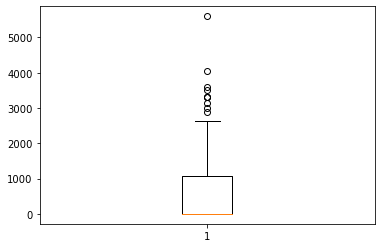

In [86]:
plt.boxplot(data['Commission'])
plt.show()

found many outliers here, outliers value got from employees commission. the highest value of outliers is 5600

In [87]:
### because we added new columns on table, we need to save the files again.

data.to_csv('HR_Data')

### Data Visualization

**1. Show the division who got most commission**

In [88]:
pd.crosstab(index=data['Job_Title'], columns='total', values=data['Commission'], aggfunc='sum').sort_values('total', ascending=False)

col_0,total
Job_Title,
Sales Representative,53990.0
Sales Manager,18650.0
Accountant,0.0
Public Accountant,0.0
Stock Clerk,0.0
Shipping Clerk,0.0
Purchasing Manager,0.0
Purchasing Clerk,0.0
Public Relations Representative,0.0


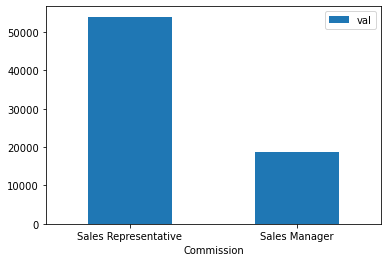

In [89]:
commission = pd.DataFrame({'Commission':['Sales Representative', 'Sales Manager',], 'val':[53990.0, 18650.0 ]})
imc = commission.plot.bar(x='Commission', y='val', rot=0)

It shows the division who got commission.

**2. Show top three the employees who got high commission**

In [95]:
commission = pd.DataFrame([data['First_Name'], data['Last_Name'], data['Salary'], data['Commission_PCT'] , data['Commission'], data['Job_Title']]).T.sort_values(['Commission_PCT', 'Commission'], ascending=False).reset_index().head(10)
commission.head(3)

,index,First_Name,Last_Name,Salary,Commission_PCT,Commission,Job_Title
0,45,John,Russell,14000.0,0.4,5600.0,Sales Manager
1,56,Janette,King,10000.0,0.35,3500.0,Sales Representative
2,57,Patrick,Sully,9500.0,0.35,3325.0,Sales Representative


it shows top three employees name who got high commission.

1. John Russel = $ 14.000

2. Janette King = $ 10.000

3. Patrick Sully = $ 9.500

currency in dollars

**3. Check correlation between salary, commission_pct and commission**

In [96]:
data.corr()

,Salary,Commission_PCT,department_id,Min_Salary,Max_Salary,Commission
Salary,1.000000,0.486379,0.625374,0.941393,0.930619,0.510246
Commission_PCT,0.486379,1.000000,0.504839,0.431848,0.422708,0.973355
department_id,0.625374,0.504839,1.000000,0.551475,0.571688,0.464336
Min_Salary,0.941393,0.431848,0.551475,1.000000,0.989971,0.443424
Max_Salary,0.930619,0.422708,0.571688,0.989971,1.000000,0.437605
Commission,0.510246,0.973355,0.464336,0.443424,0.437605,1.000000


In [97]:
import seaborn as sns

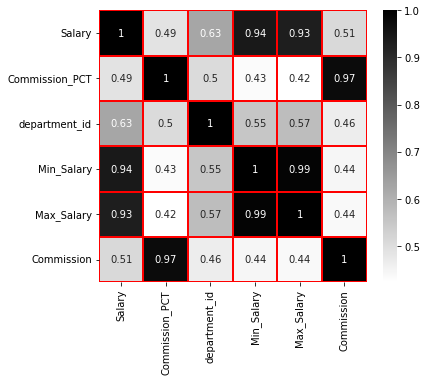

In [98]:
plt.figure(figsize=(6,5))
sns.heatmap(data.corr(), annot=True, cmap='binary', linewidth=2, linecolor='red')
plt.show()

It shows the correlation beetween numerical features and we will check the correlation between salary, commission_pct and commission

- correlation between salary and commission_pct = 0.49 it means positive correlation
- correlation between salary and and commission = 0.51 it means positive corelation
- coreelation between commission and commission_pct = 0.97 it means positive correlation

Only commission and commission_pct who get high correlation

**Hypothesis testing**

In [99]:
from scipy.stats import shapiro

In [100]:
norm, pval = shapiro(data['Commission'])

if pval < 0.05 :
    print (f'Decline H0 bcause P-Value ({pval} < 5%)')
    print ('ABNORMAL DISTRIBUTION')
else :
    print (f'False & Decline H0 Cause P-Value ({pval} > 5%)')
    print ('ABNORMAL DISTRIBUTION')

Decline H0 cause P-Value (1.0947513749204937e-14 < 5%)
ABNORMAL DISTRIBUTION


**mann whitneyu**

hypothesis testing median from salary, job_title : sales manager and sales representative

In [103]:
from scipy.stats import mannwhitneyu
mann, pval = mannwhitneyu(
    data[data['Job_Title'] == 'Sales Representative']['Salary'],
    data[data['Job_Title'] == 'Sales Manager']['Salary']
) 

if pval < 0.05 :
    print (f'Decline H0 because P-Value ({pval} < 5%)')
    print ('Found difference value between Median Salary Sales Manager and Sales Representative')
else :
    print (f'False & Decline H0 because P-Value ({pval} > 5%)')
    print ('No difference value between Median Salary Sales Manager and Sales Representative')

Decline H0 because P-Value (0.0009316457626895668 < 5%)
Found difference value between Median Salary Sales Manager and Sales Representative


salary is abnormal distribution then use the non parametric testing and use mann whitneyu.
based on testing hypothesis non parametric = decline H0 because P value under 5% and found difference beetwen median Salary Sales Manager and Sales Representative